<a href="https://colab.research.google.com/github/Shj-A/2021_DGBC_DataScience_lecture/blob/main/k_beauty_oversea_online_sale_output_shj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


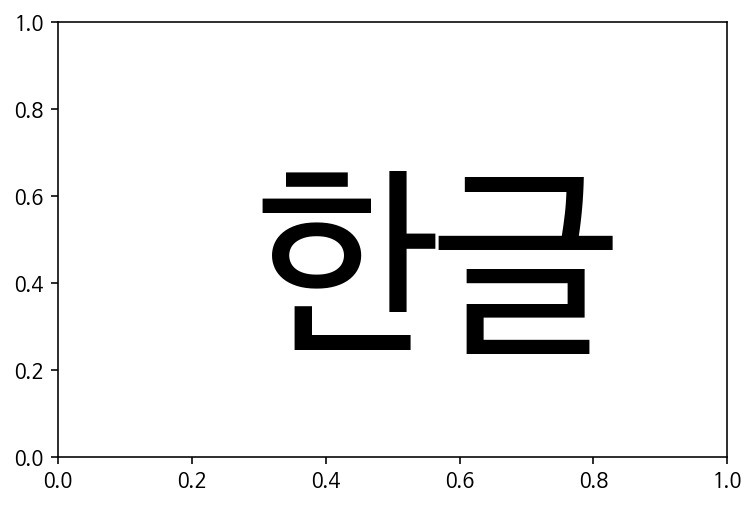

In [ ]:
plt.rc('font', family='NanumBarunGothic')
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline
plt.text(0.3, 0.3, '한글', size=100)
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 국가_대륙별_상품군별_온라인쇼핑_해외직접판매액_20142019.csv to 국가_대륙별_상품군별_온라인쇼핑_해외직접판매액_20142019.csv


In [ ]:
df_raw = pd.read_csv("국가_대륙별_상품군별_온라인쇼핑_해외직접판매액_20142019.csv", 
                     encoding="cp949")
df_raw.shape

(450, 27)

In [ ]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

일본            45
대양주           45
중동            45
중국            45
미국            45
합계            45
아세안(ASEAN)    45
중남미           45
기타            45
유럽연합(EU)      45
Name: 국가(대륙)별, dtype: int64

In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


## 데이터 전처리
### 기간에서 연도를 분리하기

In [ ]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [ ]:
int("2019 3/4 p)".split()[1].split("/")[0])

3

In [ ]:
#기간에서 분기만 분리하기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.sample(5)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
5795,대양주,음·식료품,면세점 이외,2017 1/4,23,2017,1
9929,합계,화장품,면세점 이외,2019 3/4,37521,2019,3
3761,일본,스포츠·레저용품,면세점 이외,2016 1/4,-,2016,1
6978,유럽연합(EU),컴퓨터 및 주변기기,계,2017 4/4,430,2017,4
3982,대양주,의류 및 패션 관련상품,면세점,2016 1/4,-,2016,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [ ]:
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [ ]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [ ]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [ ]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


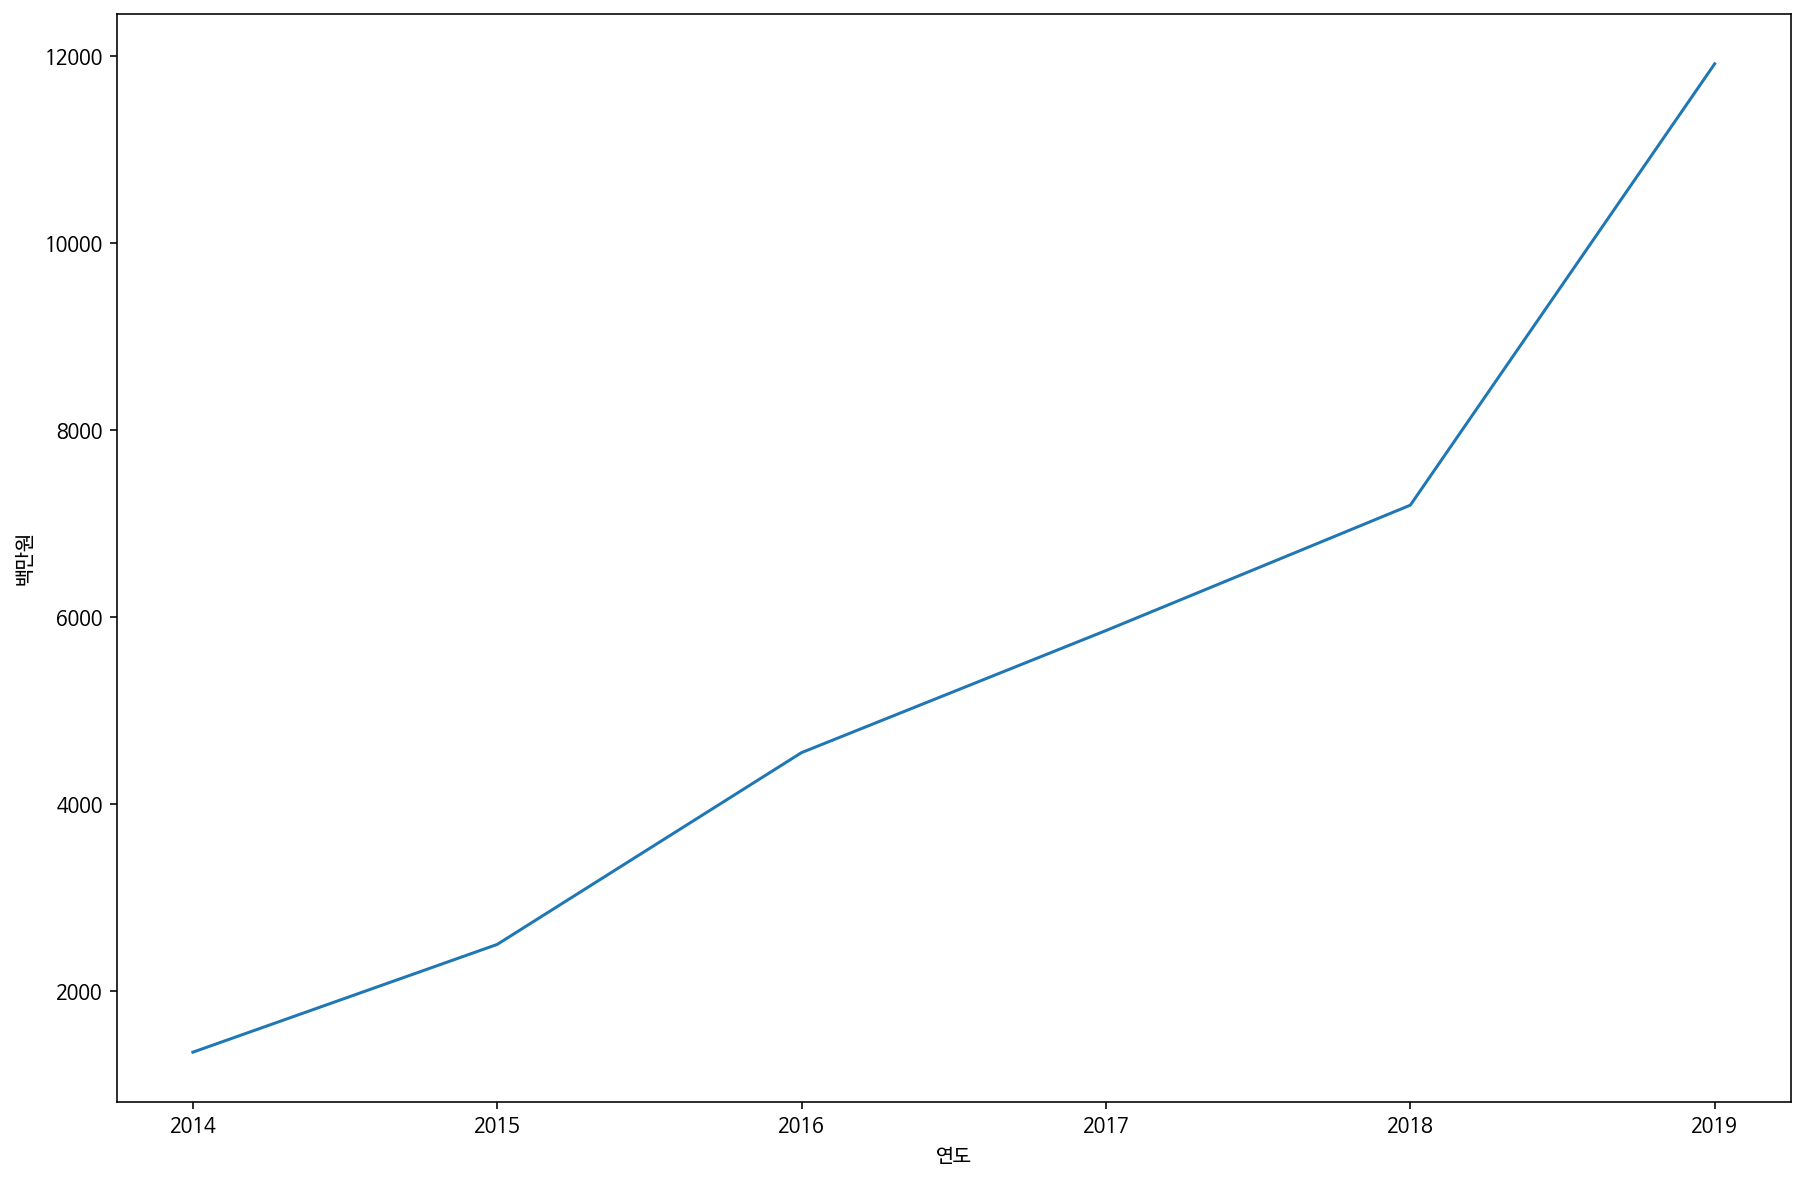

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_total, x="연도", y="백만원",ci = None)

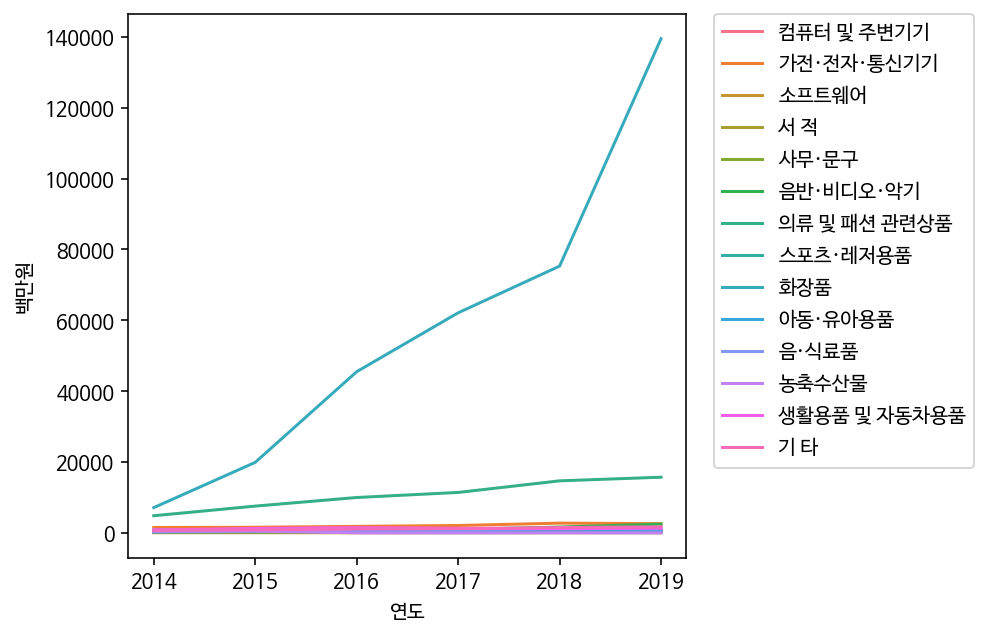

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df_total, x="연도", y="백만원", hue = "상품군별",ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

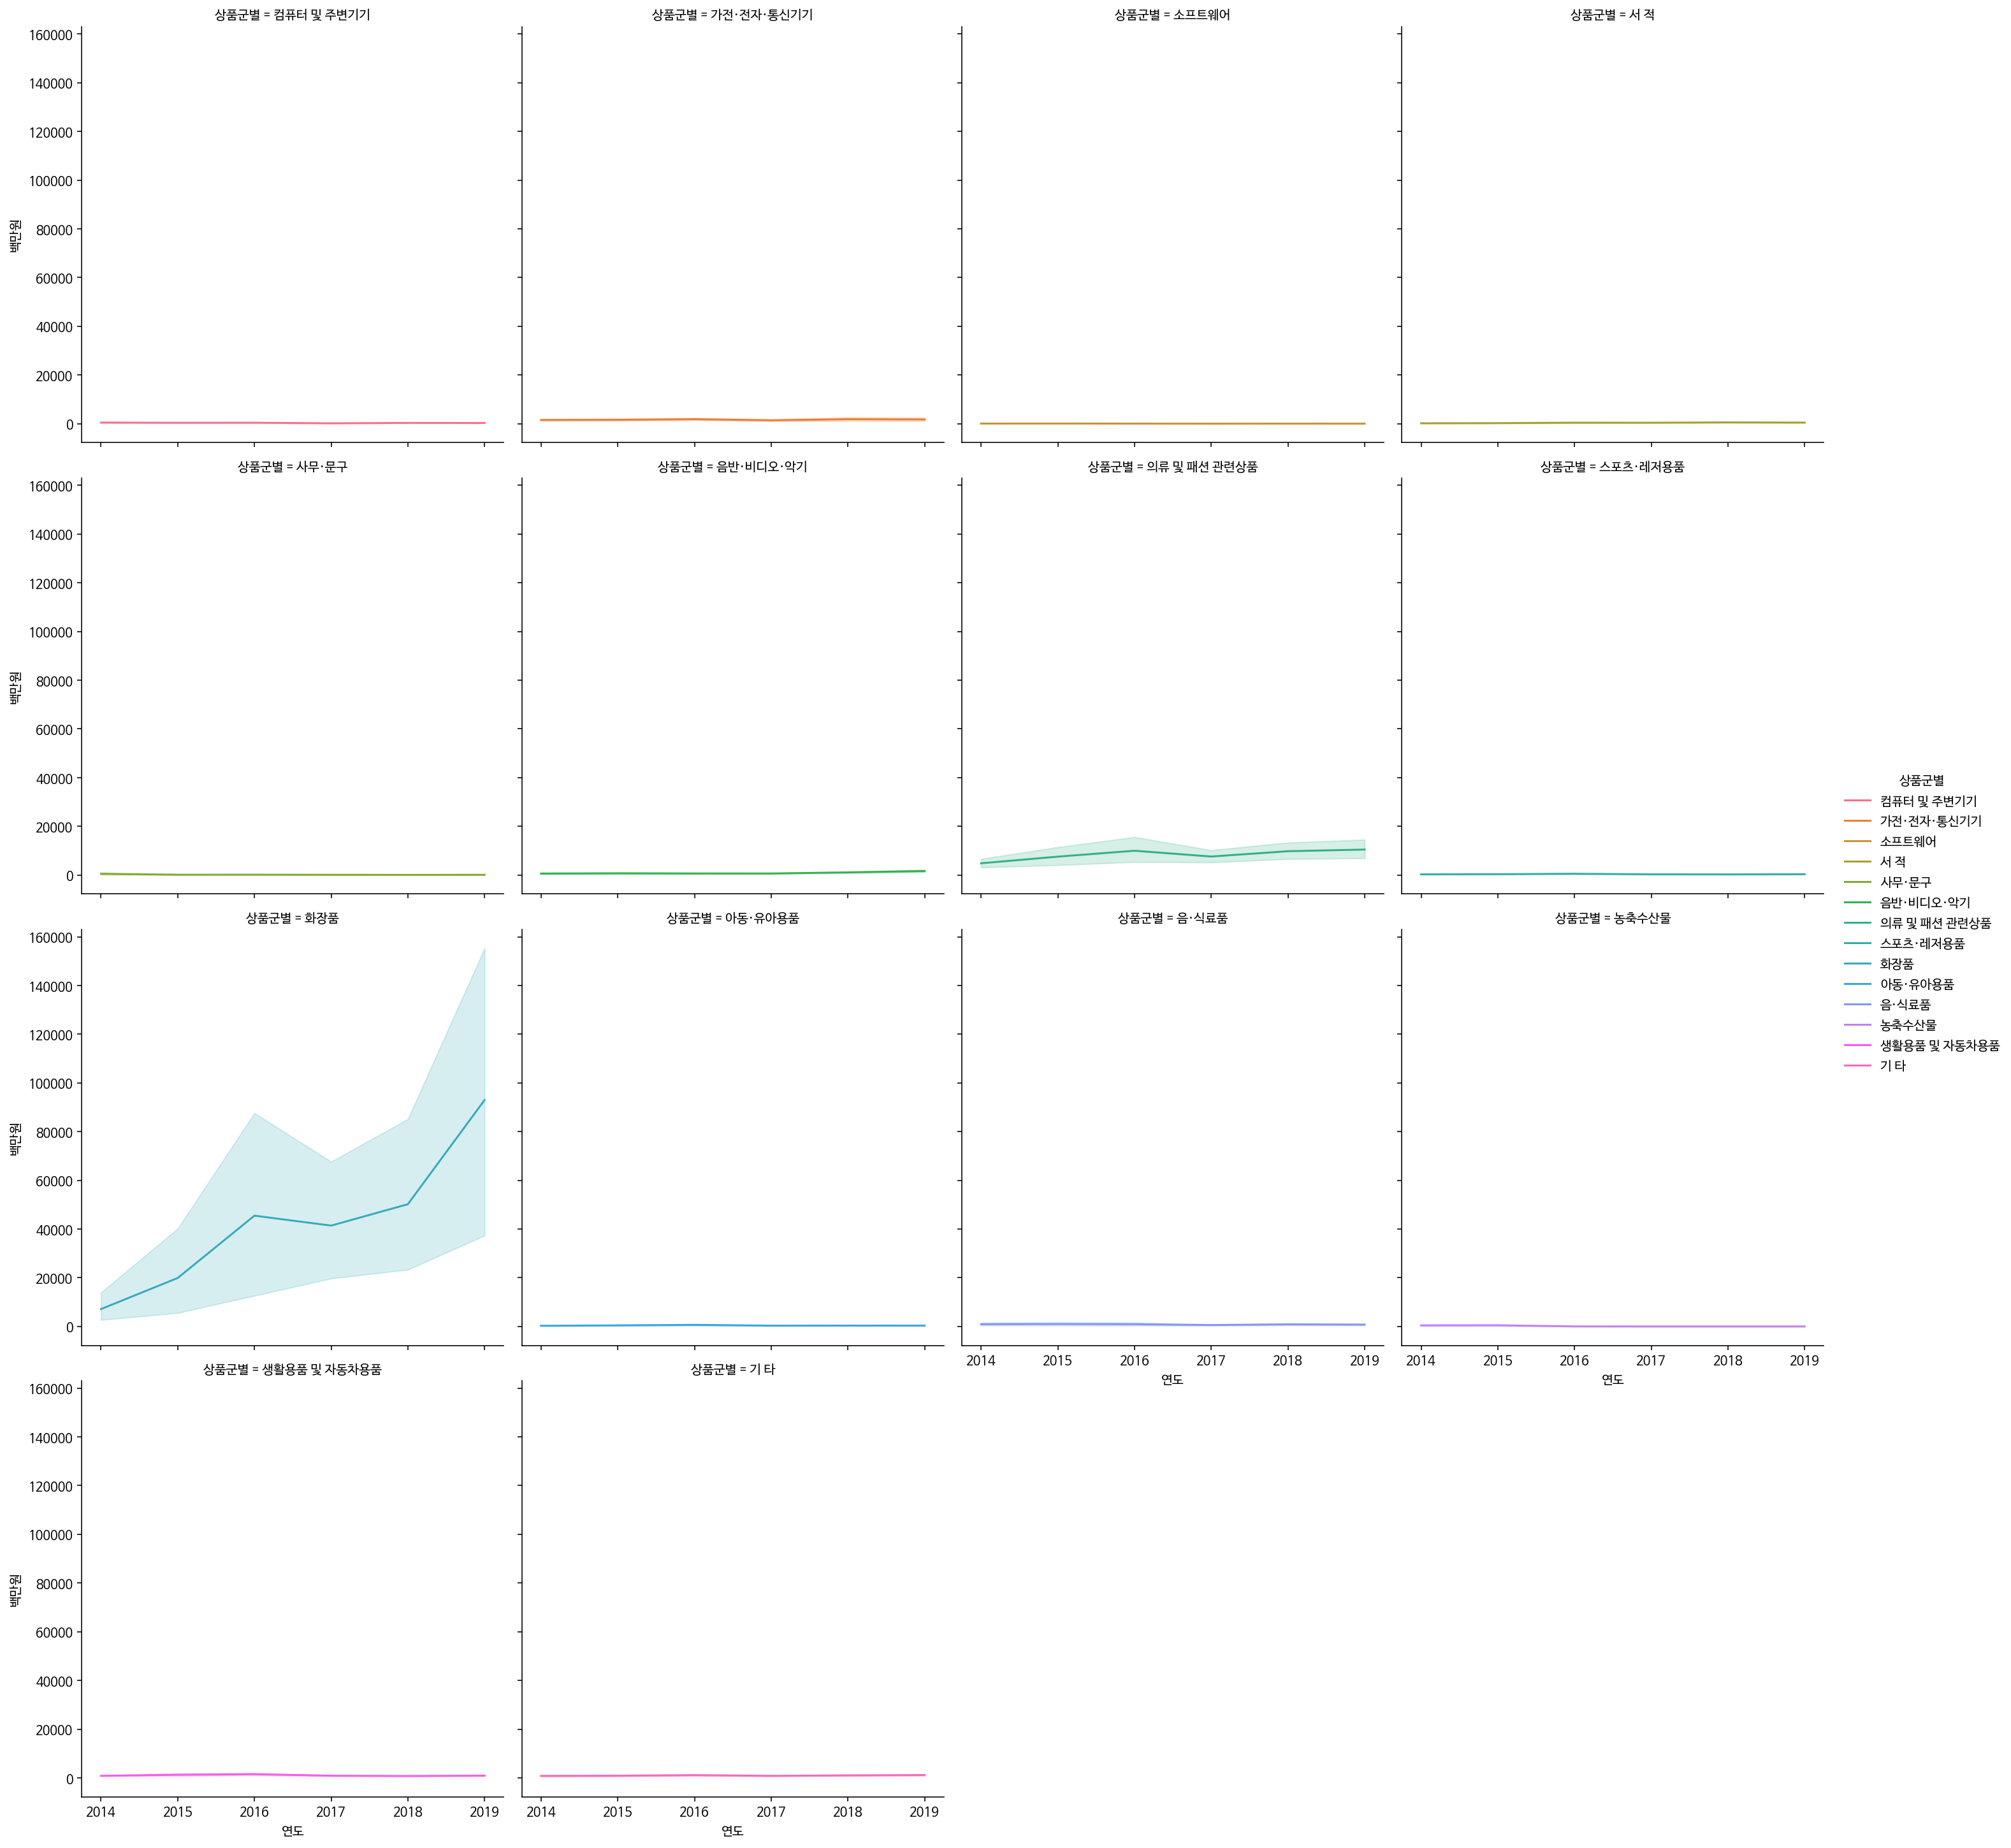

In [ ]:
sns.relplot(x="연도", y="백만원", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [ ]:
#isin을 사용해 화장품만 제외하고 df_sub에 담기
df_sub = df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션 관련상품"])].copy()

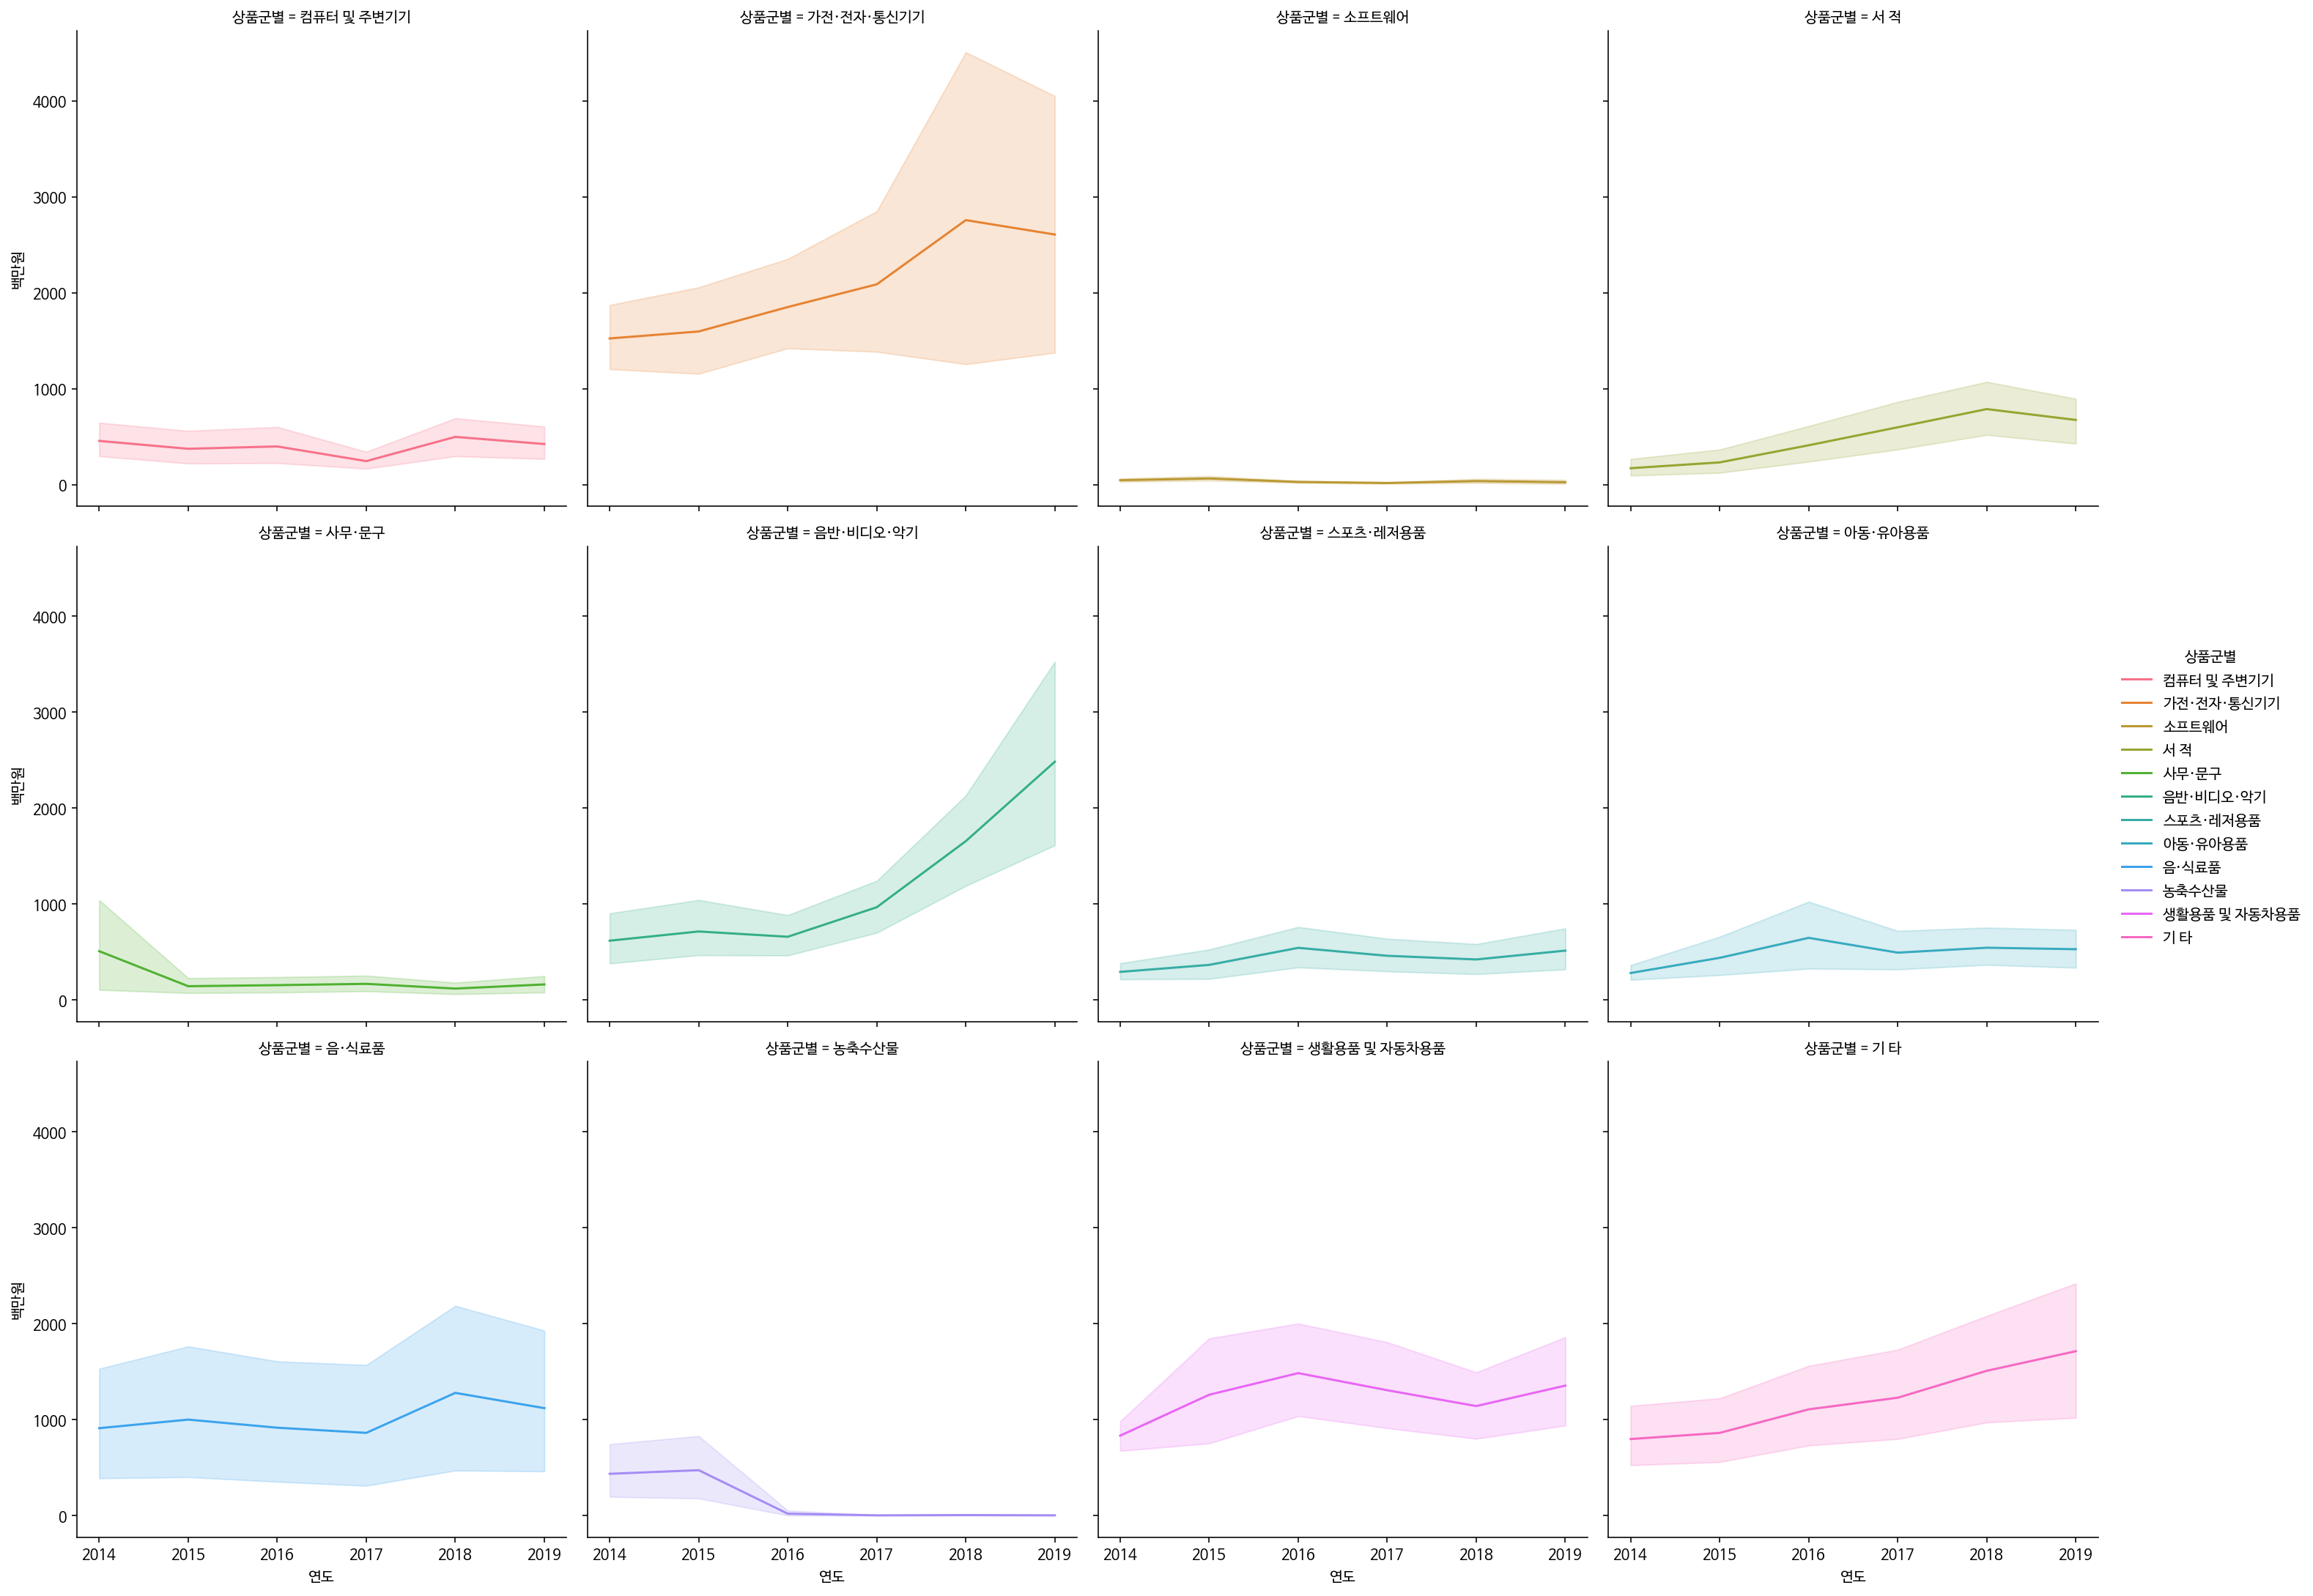

In [ ]:
sns.relplot(x="연도", y="백만원", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

In [ ]:
df_cosmetic = df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic["판매유형별"].unique()

array(['계'], dtype=object)

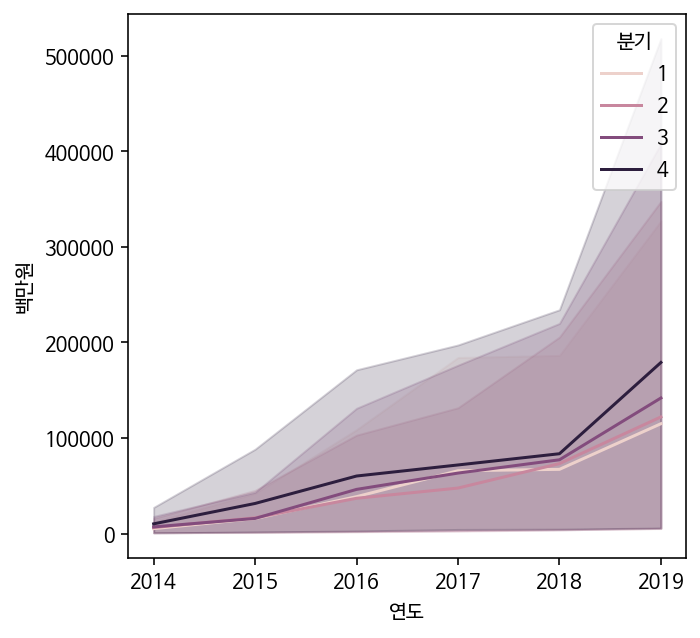

In [ ]:
plt.figure(figsize=(5, 5))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

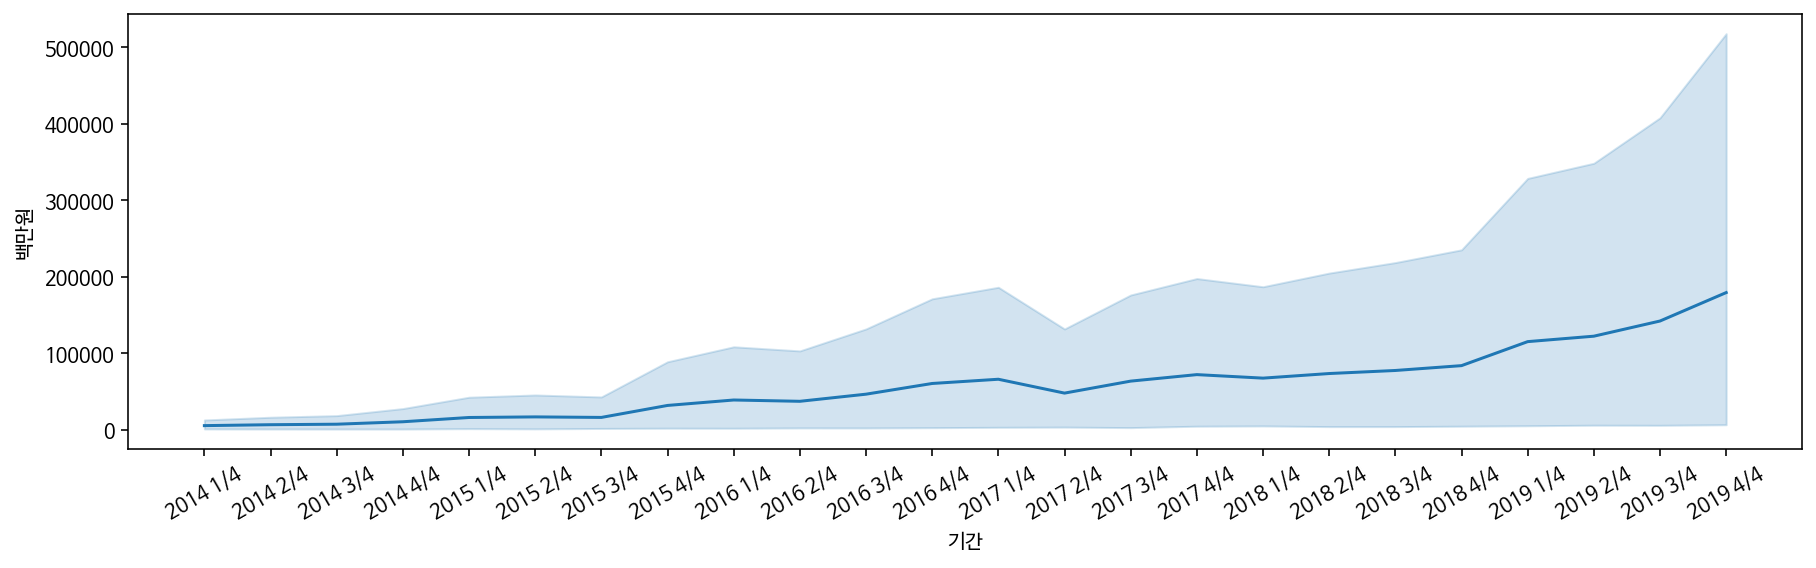

In [ ]:
#기간별 금액 시각화, xticks는 x축의 label 글씨 기울임 정도 설정옵션
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

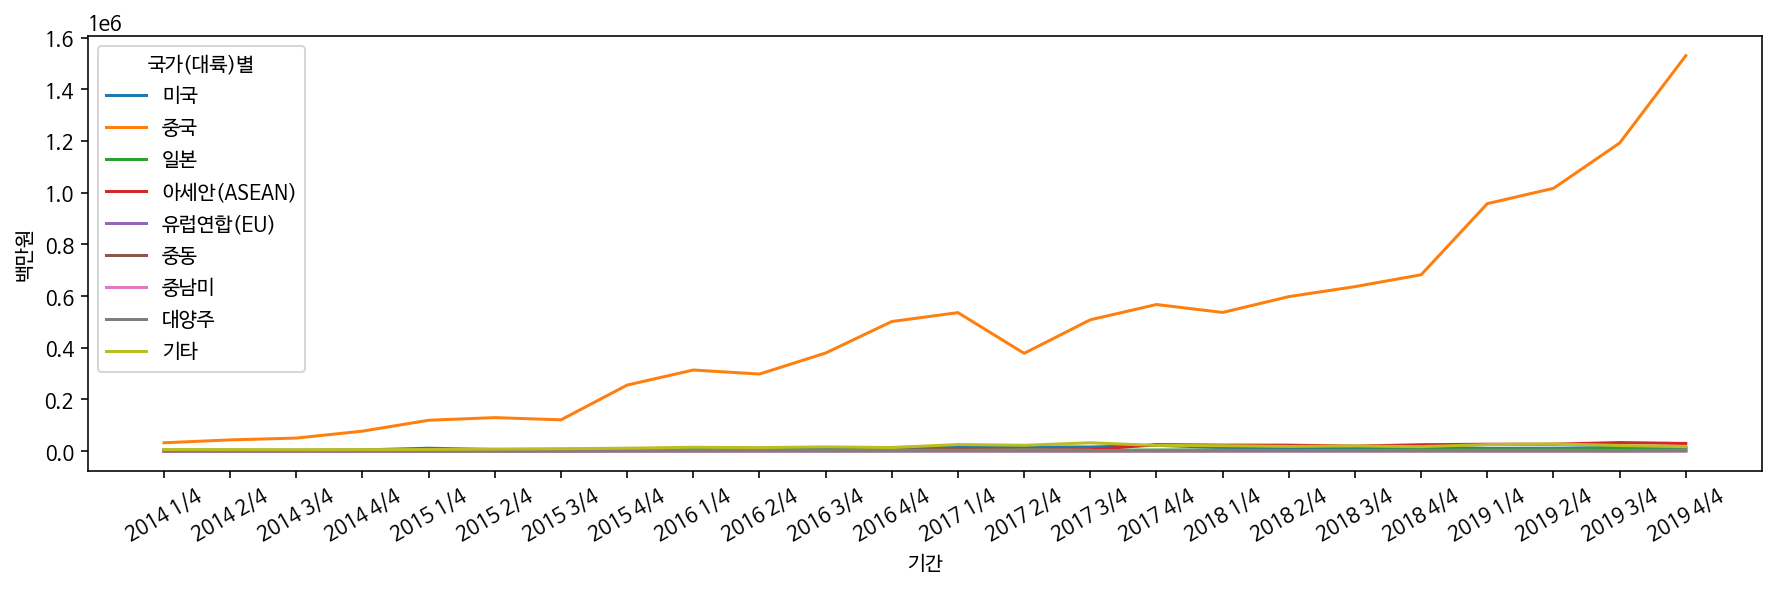

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

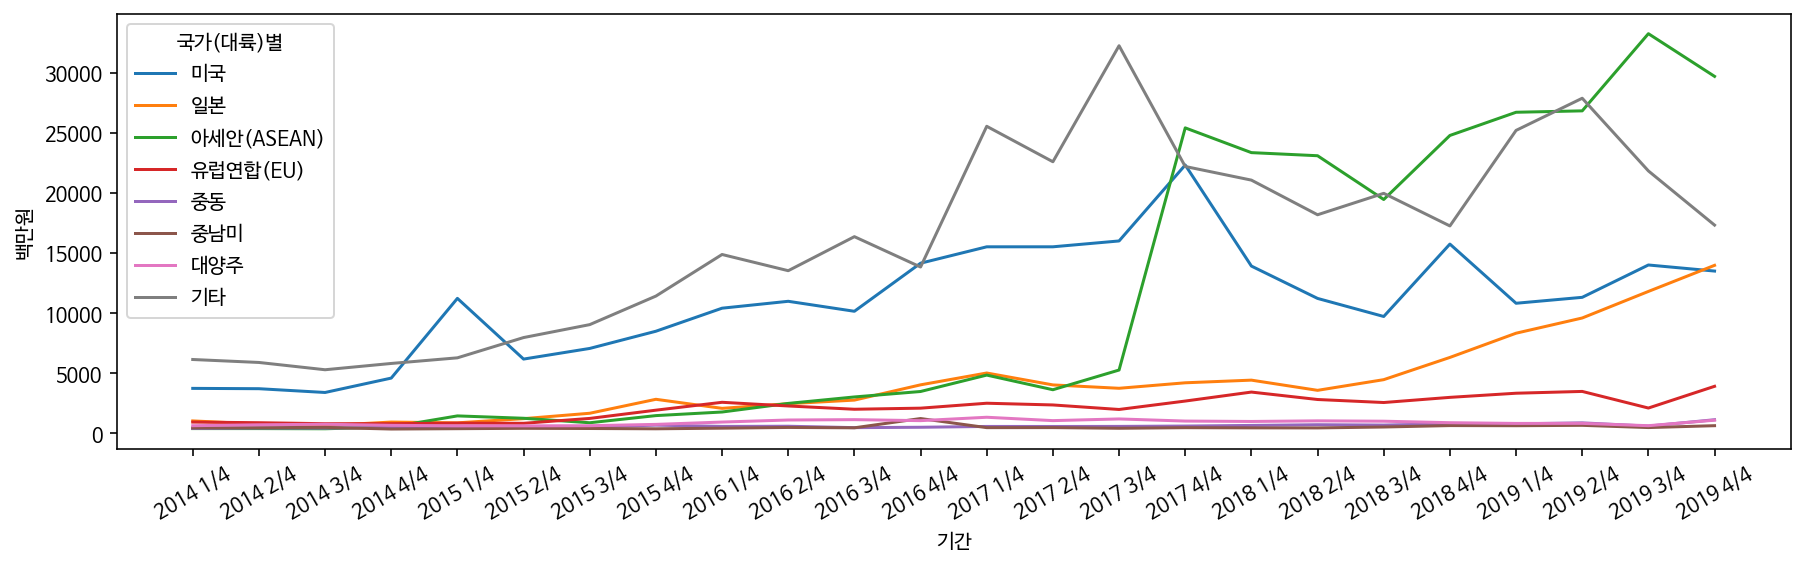

In [ ]:
#중국의 수치가 너무 크므로 중국을 제외한 나머지 그래프
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

In [ ]:
df_sub = df[df["판매유형별"] != "계"].copy()
df_sub["판매유형별"].unique()

array(['면세점', '면세점 이외'], dtype=object)

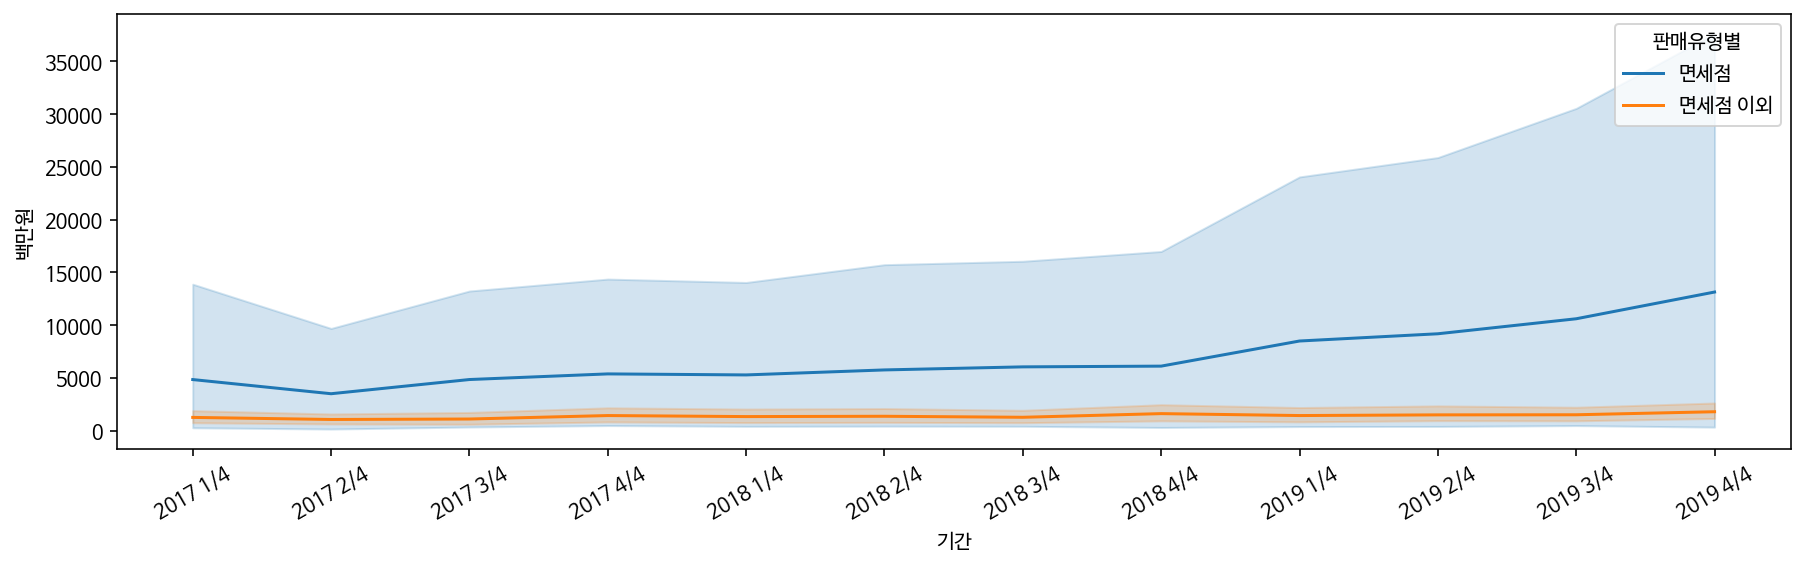

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [ ]:
df_fashion= df[(df["상품군별"]== "의류 및 패션 관련상품") &(df["판매유형별"]=="계")].copy()
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,유럽연합(EU),의류 및 패션 관련상품,계,2019 4/4,862.0,2019,4
10641,중동,의류 및 패션 관련상품,계,2019 4/4,251.0,2019,4
10686,중남미,의류 및 패션 관련상품,계,2019 4/4,124.0,2019,4
10731,대양주,의류 및 패션 관련상품,계,2019 4/4,651.0,2019,4


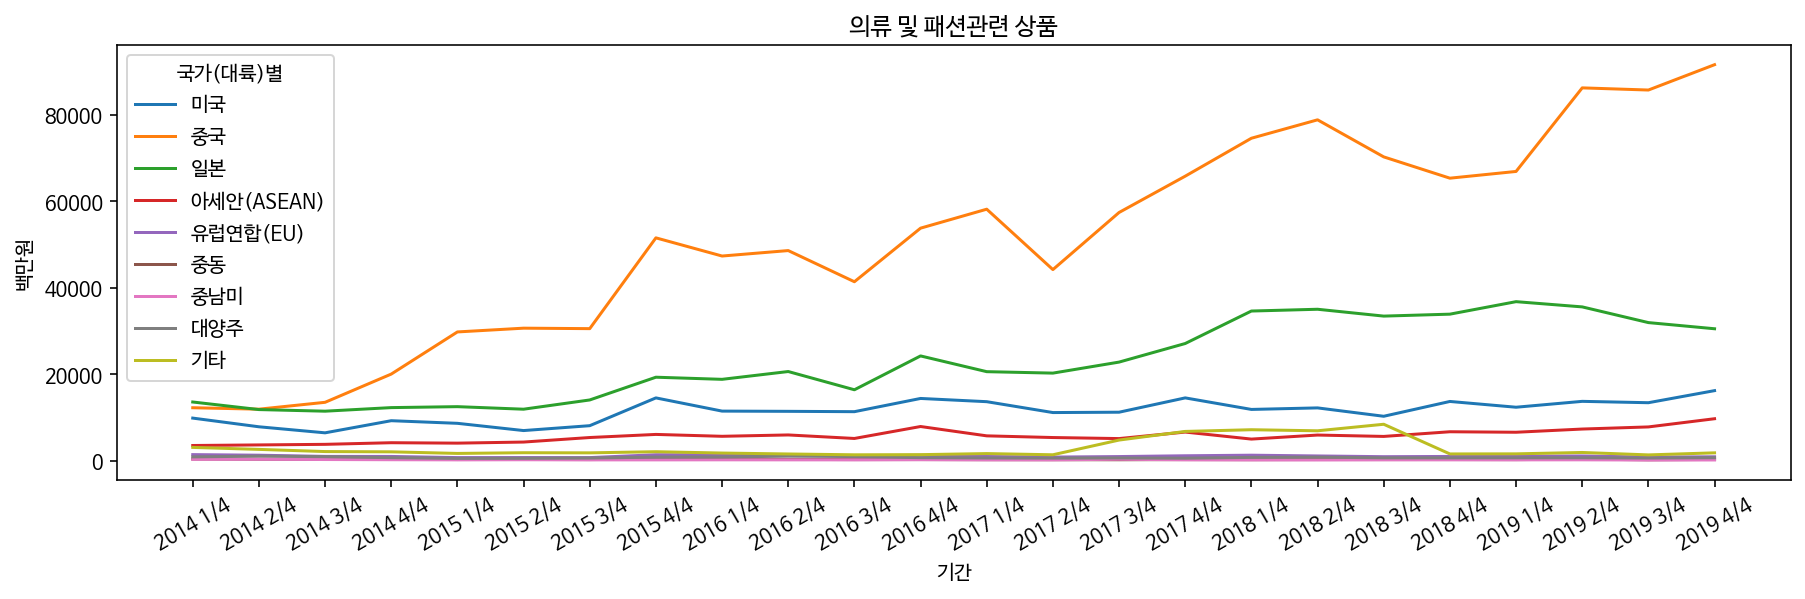

In [ ]:
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

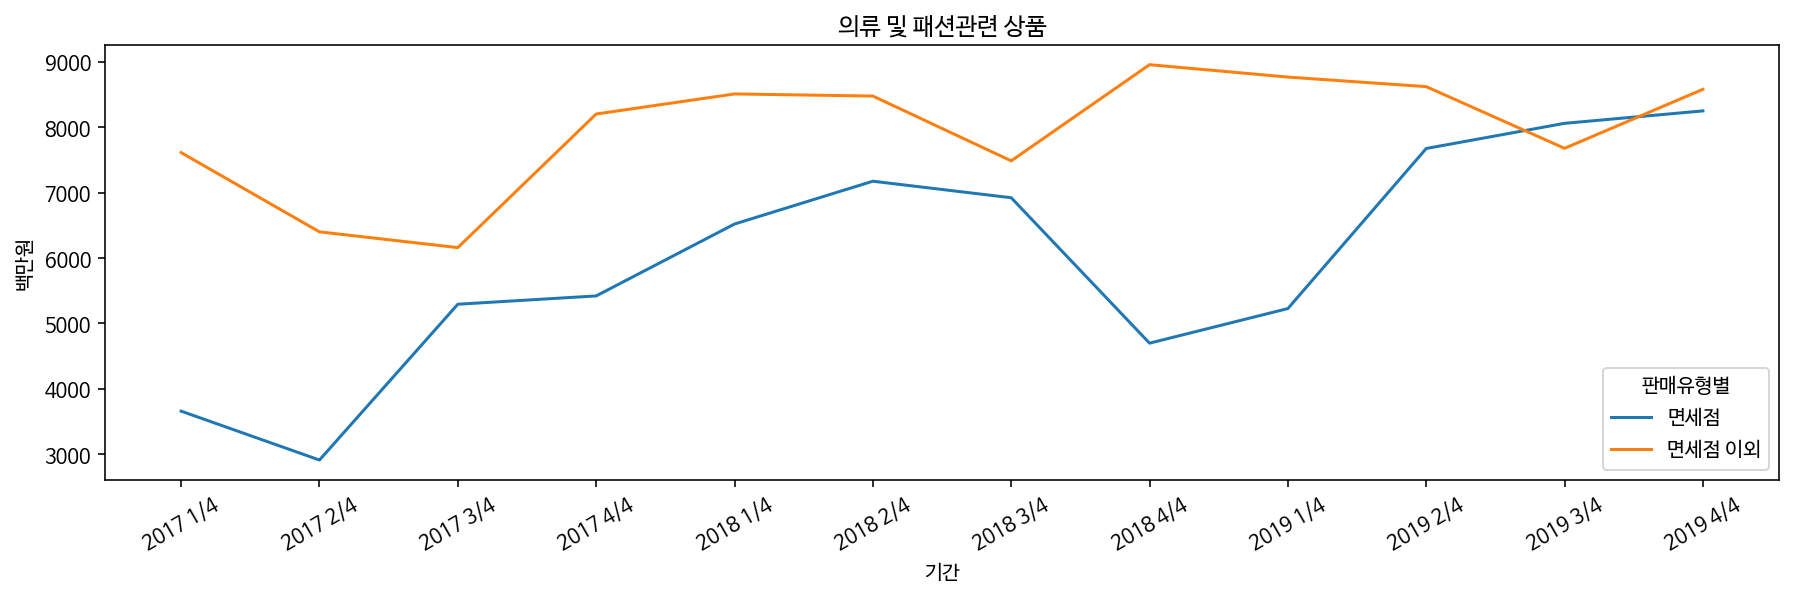

In [ ]:
df_fashion_sub = df[(df["상품군별"]== "의류 및 패션 관련상품") &(df["판매유형별"]!="계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
plt.title("의류 및 패션관련 상품")
sns.lineplot(data=df_fashion_sub, x="기간", y="백만원", hue="판매유형별", ci = None)

### 데이터 집계하기

In [ ]:
pivot = df_fashion.pivot_table(index="국가(대륙)별", values="백만원", columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


### 연산결과를 시각적으로 보기

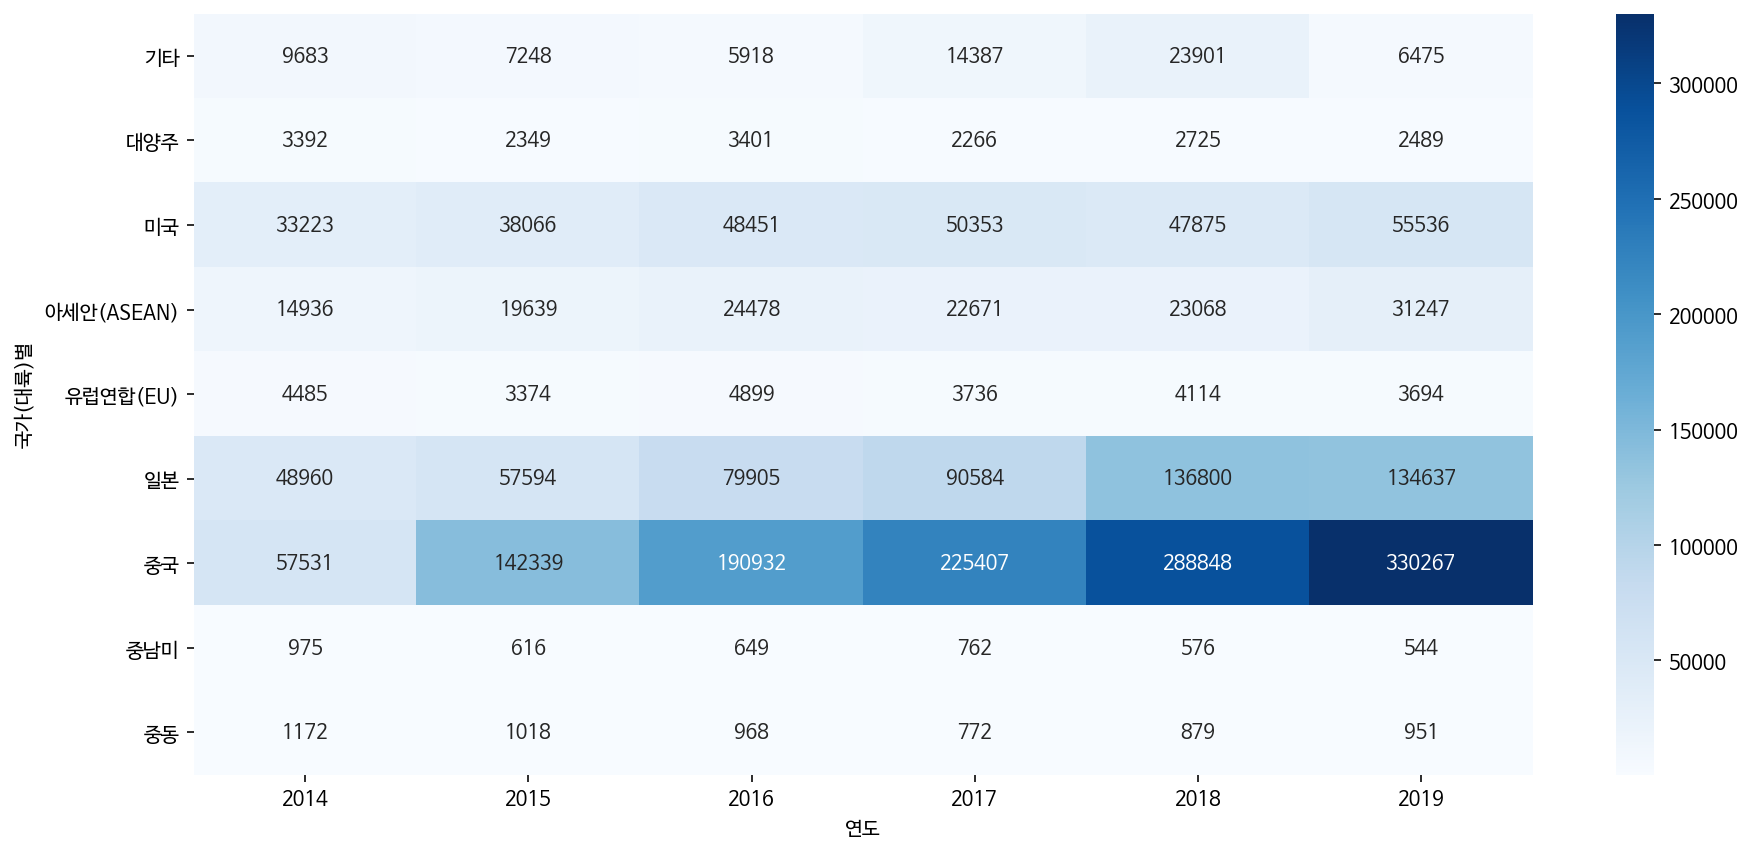

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

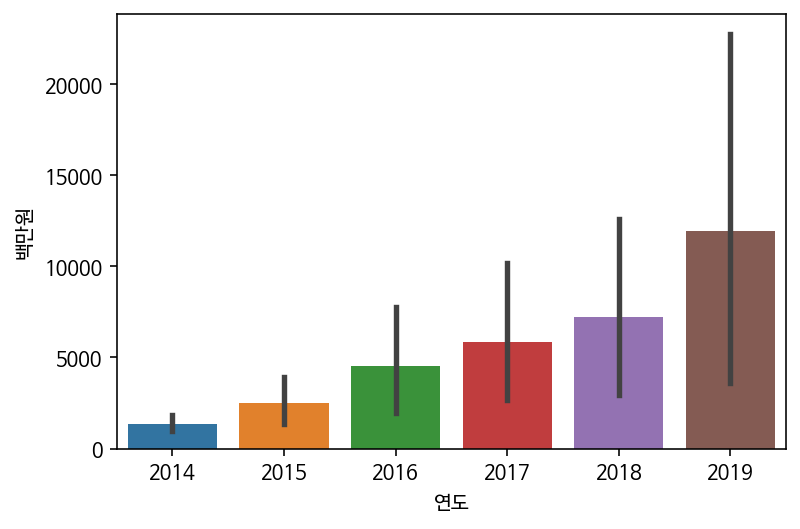

In [ ]:
sns.barplot(x="연도", y="백만원", data=df_total)

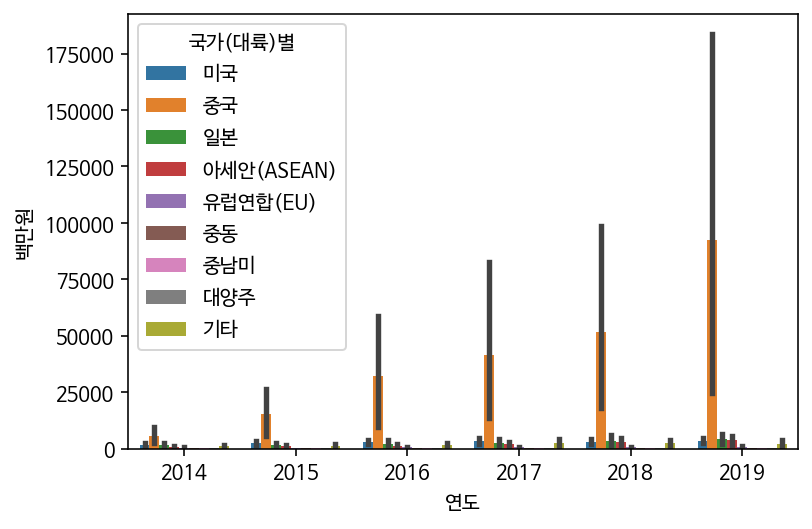

In [ ]:
sns.barplot(x="연도", y="백만원", data=df_total, hue = "국가(대륙)별")

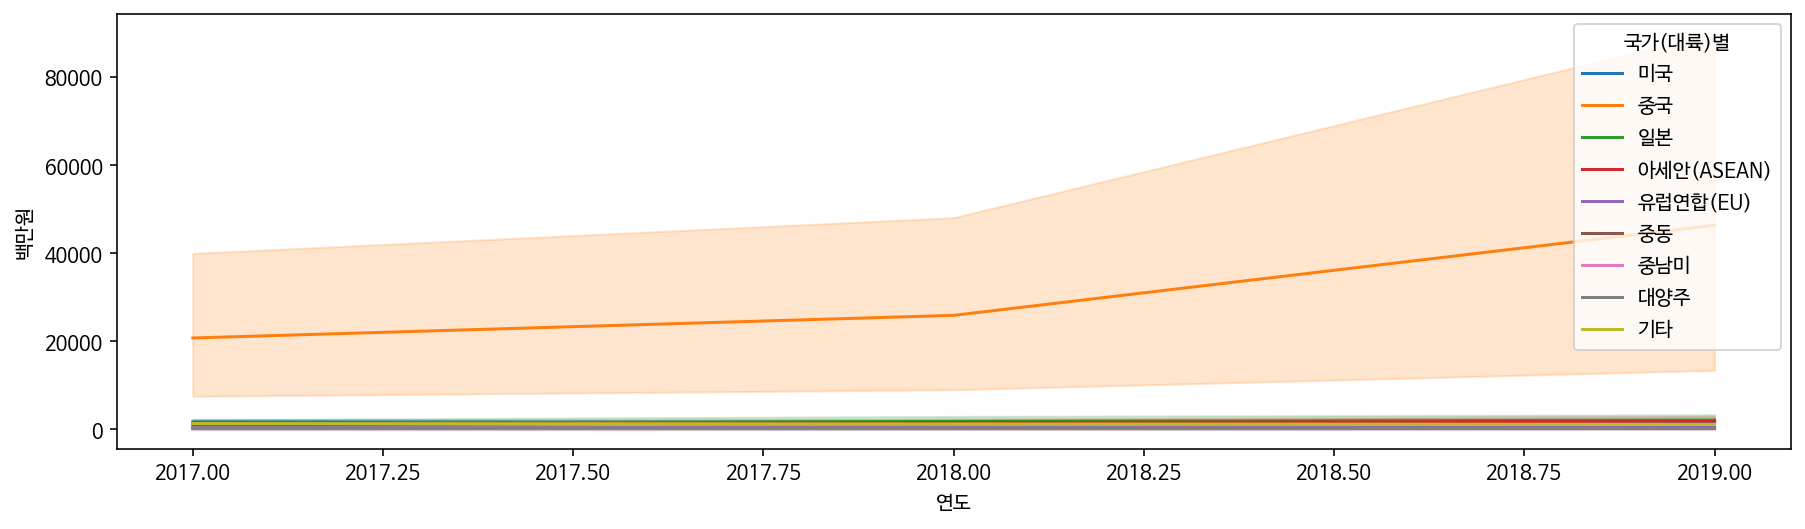

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="백만원", data=df_sub, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

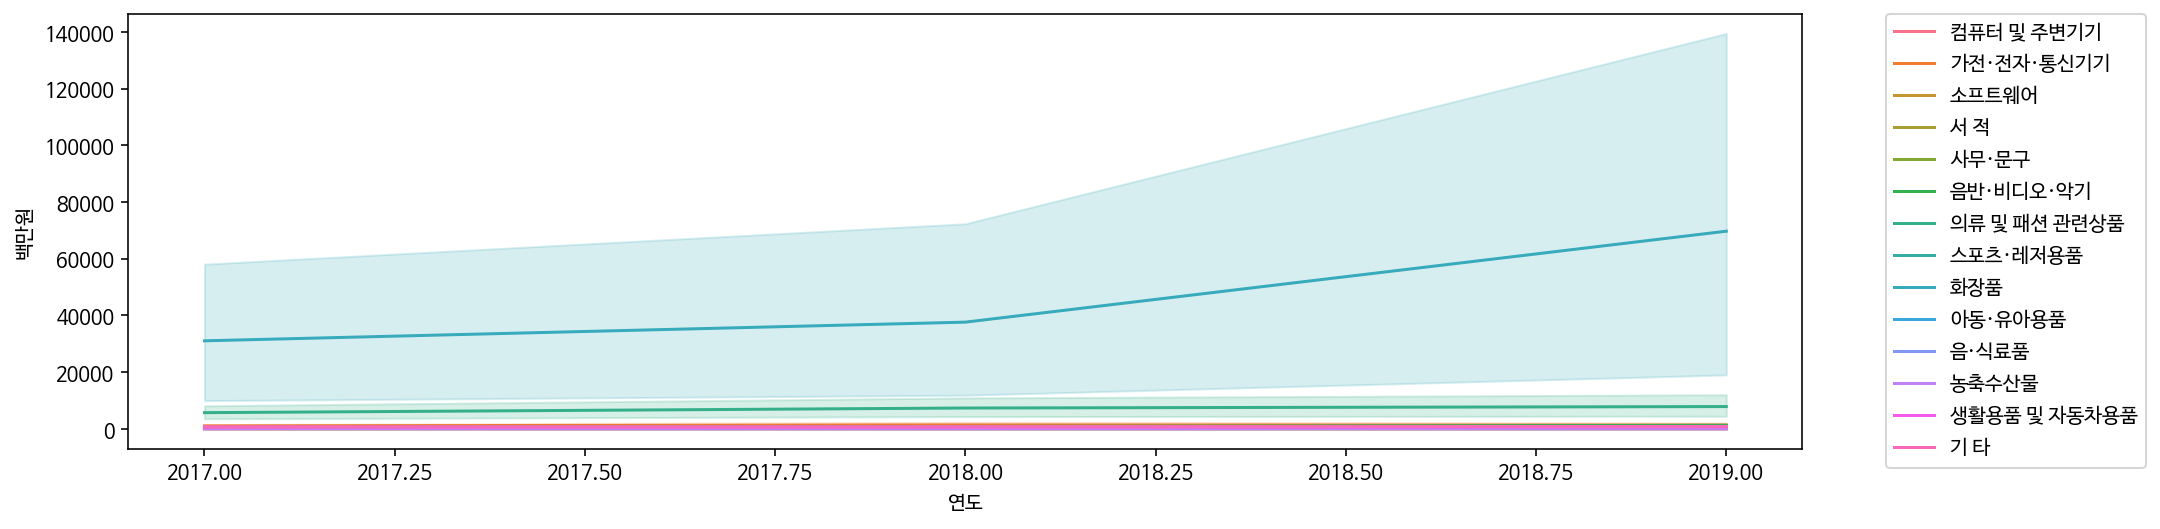

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="백만원", data=df_sub, hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)